<a href="https://colab.research.google.com/github/arun4589/ML/blob/main/transfer_learning_1(with_data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:11<00:00, 197MB/s]
100% 1.06G/1.06G [00:11<00:00, 103MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization,Dropout
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

In [5]:
from keras.applications.vgg16 import VGG16
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
# include_top=false means we only taking conv layers not FC layers(top)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
conv_base.trainable = False
# due to this code we are just freezing the conv layer by making its parameters nontrainable

In [7]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
# data augmentation
# basiclly it produce images with different orientation and reduce overfitting can be done in two ways
# 1.one single photo
# 2.multiple photo in one folder(in this tut)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [11]:
batch_size=32

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator=test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [12]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [14]:
history=model.fit(
    train_generator,

    epochs=10,
    validation_data=validation_generator,

)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 180s 270ms/step - accuracy: 0.8362 - loss: 0.3731 - val_accuracy: 0.8936 - val_loss: 0.2474
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 279ms/step - accuracy: 0.8987 - loss: 0.2402 - val_accuracy: 0.9124 - val_loss: 0.2071
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 279ms/step - accuracy: 0.9054 - loss: 0.2216 - val_accuracy: 0.9178 - val_loss: 0.1996
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 277ms/step - accuracy: 0.9174 - loss: 0.2004 - val_accuracy: 0.8944 - val_loss: 0.2563
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 276ms/step - accuracy: 0.9121 - loss: 0.2069 - val_accuracy: 0.9162 - val_loss: 0.1935
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 278ms/step - accuracy: 0.9209 - loss: 0.1868 - val_accuracy: 0.9178 - val_loss: 0.1919
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 265ms/step - accuracy: 0.9251 - loss: 0.1774 - val_accuracy: 0.9094 - val_loss: 0.2296
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 262ms/step - accuracy: 0.9299 - loss: 0.16

Text(0.5, 0, 'epoch')

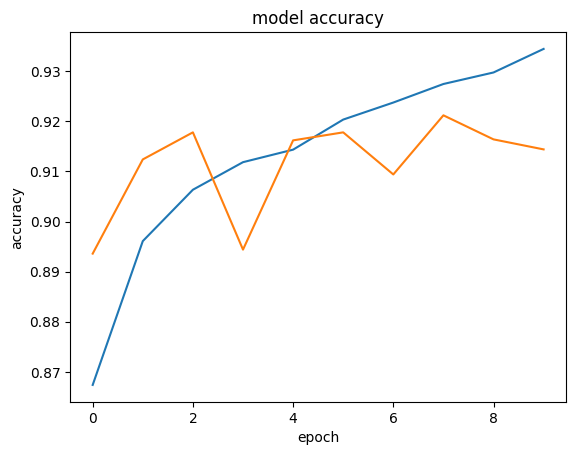

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

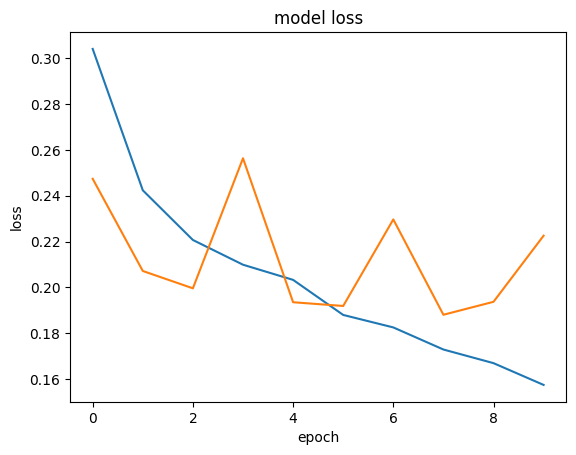

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')